In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out

def path_to_xyth(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    estimated['thcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,2])                                
    return (estimated)
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [4]:
both=True
data=pd.read_csv('dataset_candidatura_wr/lecs_odom(goodman).txt')    #dataset_candidatura_wr/lecs_odom(goodman).txt
data2=pd.read_csv('dataset_candidatura_wr/lecs_odom(goodman).txt')
data3=pd.read_csv('dataset_candidatura_wr/lecs_odom_room1.txt')
#data=data2
#data=data.iloc[:30000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)
data.columns=etiquetas

if both:
    

    data2.columns,data3.columns=etiquetas,etiquetas
    data=pd.concat((data,data2,data3))
    

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,10)
data.iloc[:,0:n_reads]=lecs

data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,...,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000
mean,2.220139,2.224096,2.223893,2.223337,2.221513,2.218960,2.215589,2.214412,2.210021,2.207456,...,2.086087,2.087719,2.091707,2.094490,2.096781,2.098291,2.100169,1.379012,2.158348,0.119640
std,1.986481,1.988746,1.989453,1.990734,1.987785,1.987190,1.984342,1.983562,1.981224,1.977804,...,1.688017,1.687294,1.694642,1.700105,1.703257,1.705895,1.709572,0.763461,1.393929,1.877904
min,0.426443,0.426465,0.426445,0.424923,0.424836,0.424520,0.423348,0.423476,0.422594,0.422392,...,0.391625,0.363851,0.359515,0.355293,0.351181,0.348181,0.349226,-0.196506,-0.069274,-3.141579
25%,1.232500,1.231820,1.230891,1.228940,1.227978,1.227862,1.225831,1.224906,1.224723,1.225078,...,1.292327,1.294042,1.296972,1.298184,1.300598,1.302437,1.304769,0.864096,0.799728,-1.541226
50%,1.728210,1.727302,1.726287,1.725352,1.724529,1.722216,1.719676,1.718887,1.717277,1.717356,...,1.740017,1.743698,1.748104,1.748441,1.751004,1.755889,1.758384,1.294369,1.915629,0.131739
75%,2.474084,2.465546,2.460162,2.458557,2.458496,2.451883,2.444599,2.438098,2.430931,2.423596,...,2.301554,2.305327,2.307963,2.313014,2.317850,2.321405,2.323992,2.067101,3.660658,1.727418
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.773765,4.515830,3.141566


In [5]:
get_new_ccs= True
Q_aff=True
if get_new_ccs:
    
    K_corpus=128
    N=32
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)


if (Q_aff==True):
    clf=load('aff_prop_class.joblib')  
    data['Vk_aff']=clf.predict(lecs)
if (Q_aff!=True):
    data['Vk_aff']=data['Vk']

data['Y']=aus
data['Vk']=auvks
obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',ccxyth)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
data['Y'].describe()   

new obs/ est almacenados


count    34298.000000
mean        15.067555
std          9.011784
min          0.000000
25%          7.000000
50%         14.000000
75%         23.000000
max         31.000000
Name: Y, dtype: float64

In [6]:
new_xyth=False
if new_xyth:

    xyth_symbols=data[['x','y','theta','Vk','Vk_aff']]
    mbk.fit(xyth_symbols)
    ccxyth_symbols=mbk.cluster_centers_
    ccxyth=ccxyth_symbols[:,:3]
    data.Y=mbk.labels_
    est= data['Y'].values



In [7]:
save=True

In [8]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
count,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,...,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000,34298.000000
mean,2.220139,2.224096,2.223893,2.223337,2.221513,2.218960,2.215589,2.214412,2.210021,2.207456,...,2.094490,2.096781,2.098291,2.100169,1.379012,2.158348,0.119640,160.412735,15.067555,60.583853
std,1.986481,1.988746,1.989453,1.990734,1.987785,1.987190,1.984342,1.983562,1.981224,1.977804,...,1.700105,1.703257,1.705895,1.709572,0.763461,1.393929,1.877904,95.026748,9.011784,36.698259
min,0.426443,0.426465,0.426445,0.424923,0.424836,0.424520,0.423348,0.423476,0.422594,0.422392,...,0.355293,0.351181,0.348181,0.349226,-0.196506,-0.069274,-3.141579,0.000000,0.000000,0.000000
25%,1.232500,1.231820,1.230891,1.228940,1.227978,1.227862,1.225831,1.224906,1.224723,1.225078,...,1.298184,1.300598,1.302437,1.304769,0.864096,0.799728,-1.541226,72.000000,7.000000,27.000000
50%,1.728210,1.727302,1.726287,1.725352,1.724529,1.722216,1.719676,1.718887,1.717277,1.717356,...,1.748441,1.751004,1.755889,1.758384,1.294369,1.915629,0.131739,161.000000,14.000000,64.000000
75%,2.474084,2.465546,2.460162,2.458557,2.458496,2.451883,2.444599,2.438098,2.430931,2.423596,...,2.313014,2.317850,2.321405,2.323992,2.067101,3.660658,1.727418,245.000000,23.000000,85.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,2.773765,4.515830,3.141566,317.000000,31.000000,127.000000


In [9]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

MODEL SAVED


(32, 128)

In [10]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

MODEL SAVED


(32, 318)

In [11]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,0.884895,0.882944,0.881031,0.879156,0.877319,0.875520,0.873757,0.872031,0.870342,0.868688,...,3.376319,3.352007,3.328156,3.304753,2.355445,4.095427,1.734082,49,28,63
1,0.884872,0.882922,0.881012,0.879139,0.877304,0.875506,0.873746,0.872022,0.870334,0.868683,...,3.374903,3.350619,3.326794,3.303416,2.355416,4.095451,1.734425,49,28,63
2,0.884840,0.882892,0.880984,0.879113,0.877280,0.875485,0.873726,0.872005,0.870319,0.868670,...,3.373422,3.349166,3.325369,3.302019,2.355390,4.095482,1.734785,49,28,63
3,0.884801,0.882857,0.880950,0.879082,0.877252,0.875458,0.873702,0.871983,0.870299,0.868652,...,3.371853,3.347628,3.323860,3.300539,2.355371,4.095522,1.735171,49,28,63
4,0.884759,0.882817,0.880913,0.879047,0.877219,0.875428,0.873674,0.871957,0.870276,0.868631,...,3.370189,3.345995,3.322259,3.298968,2.355348,4.095561,1.735578,49,28,63


In [12]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [13]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

13011
(0.0, 0.0)


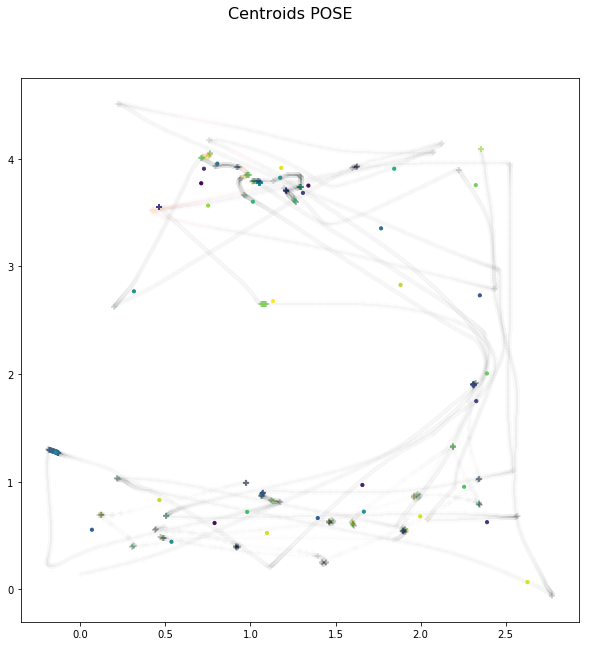

In [14]:
cc=ccxyth
fig = plt.figure(figsize=(10,10))
fig.suptitle('Centroids POSE', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)
cords3=path_to_xyth(np.arange(0,Modelo1.A.shape[0]),cc)
scatter= ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c=cords3.thcuant)
#legend1 = ax1.legend(*scatter.legend_elements(),loc=3 ,title="Classes")
#ax1.add_artist(legend1)
#ax1.legend()


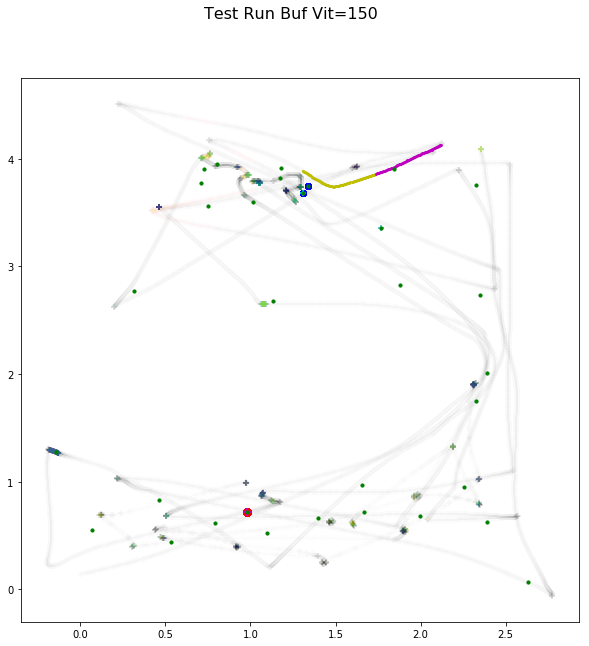

In [15]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [16]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

13011
(1.0, 1.0)


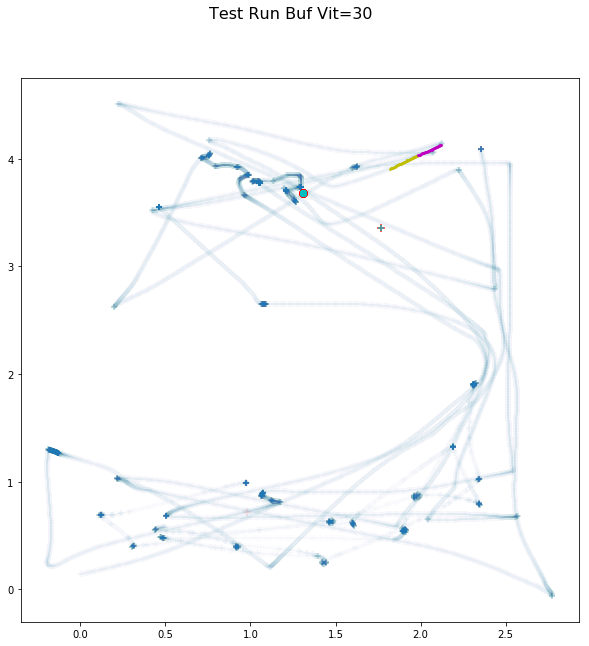

In [63]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',alpha=.0113)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



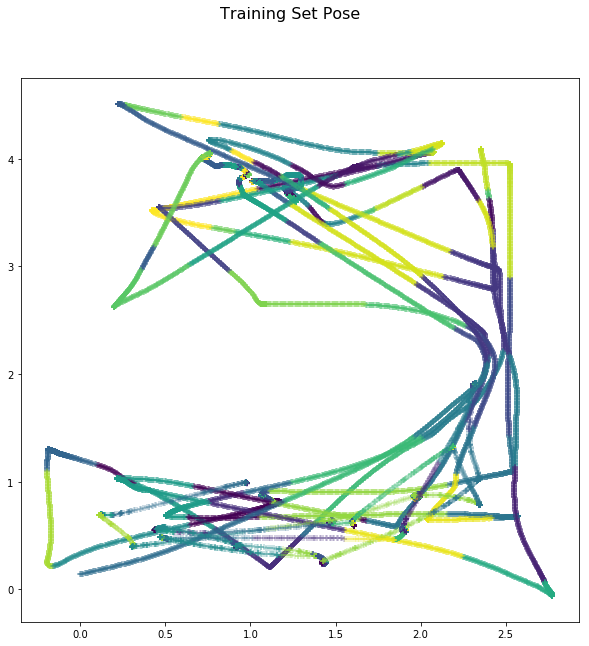

In [18]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


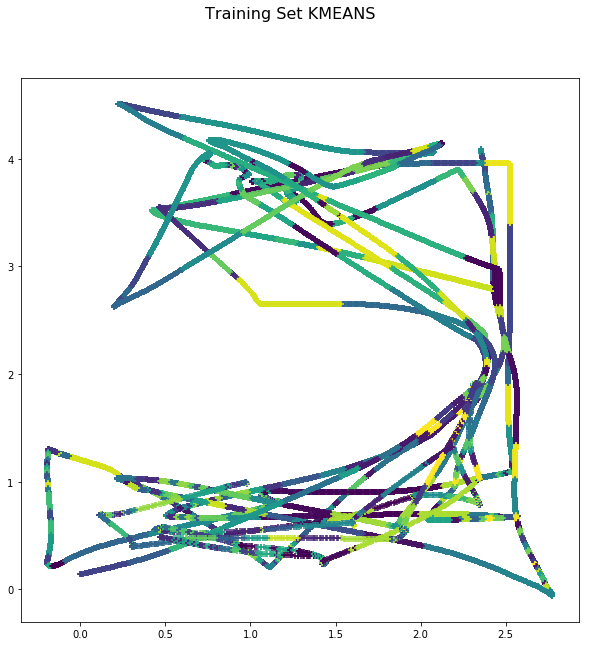

In [19]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


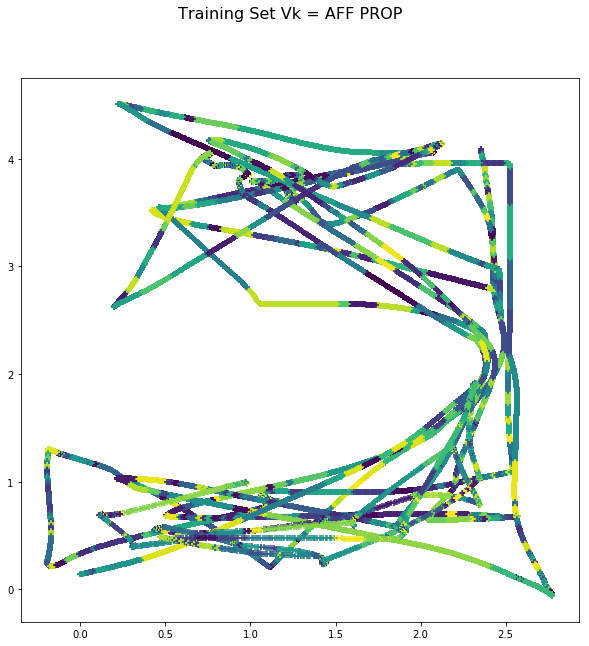

In [20]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [21]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 3)

3


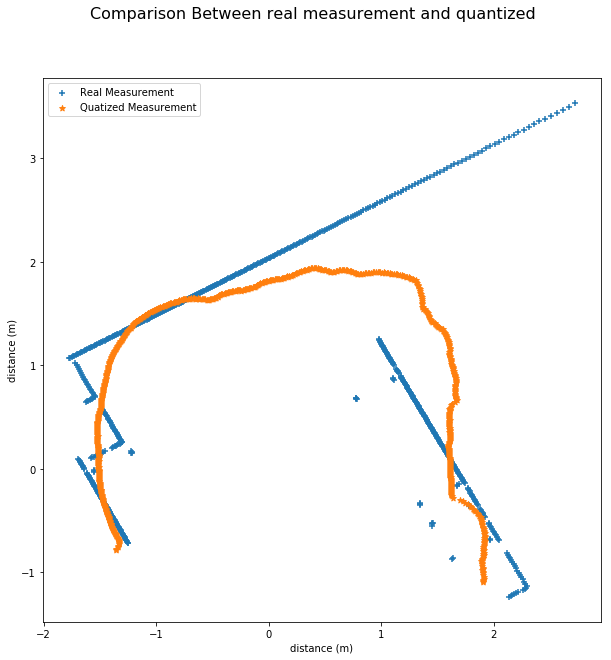

In [22]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real measurement and quantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', label='Real Measurement')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label='Quatized Measurement')
ax1.set_xlabel('distance (m)')
ax1.set_ylabel('distance (m)')
ax1.legend()


In [23]:
lecs=data[data.Vk==lec_leida]
lecs.shape

(1646, 727)

In [24]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

3


3


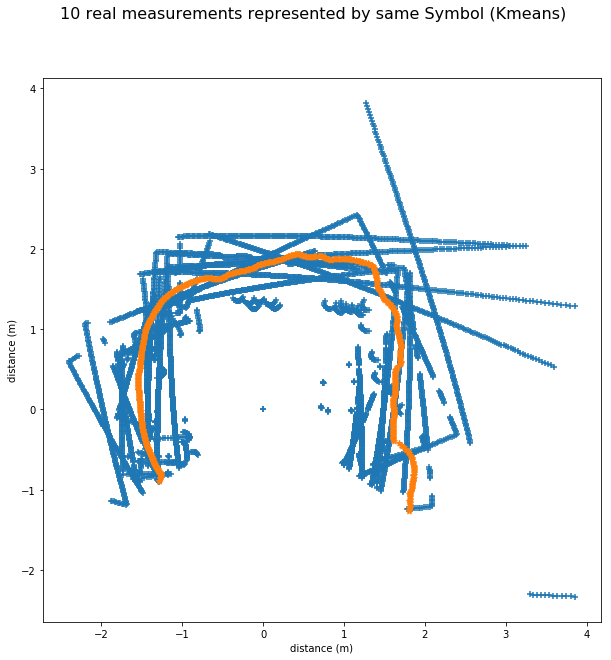

In [25]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))


fig.suptitle('10 real measurements represented by same Symbol (Kmeans)', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

ax1.set_xlabel('distance (m)')
ax1.set_ylabel('distance (m)')

print(lec_leida)






In [26]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())


 
lec_deseada=aux.index[4]   ###CHOOSING 5th MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 64)

64


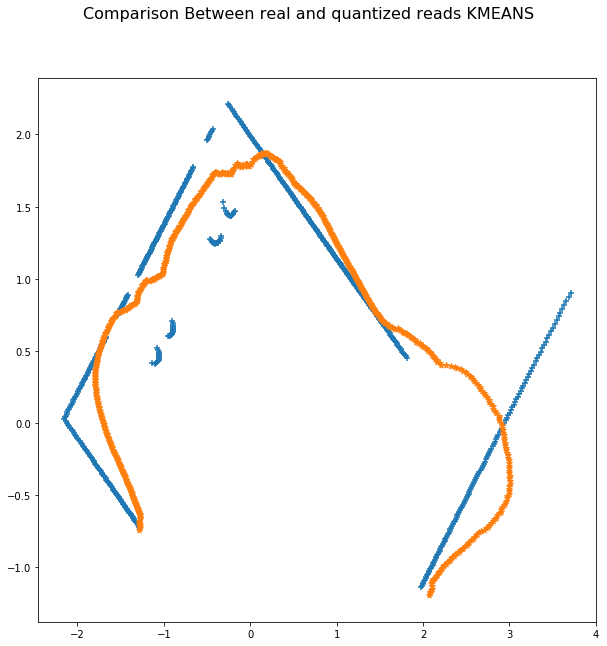

In [27]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real and quantized reads KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [28]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

64


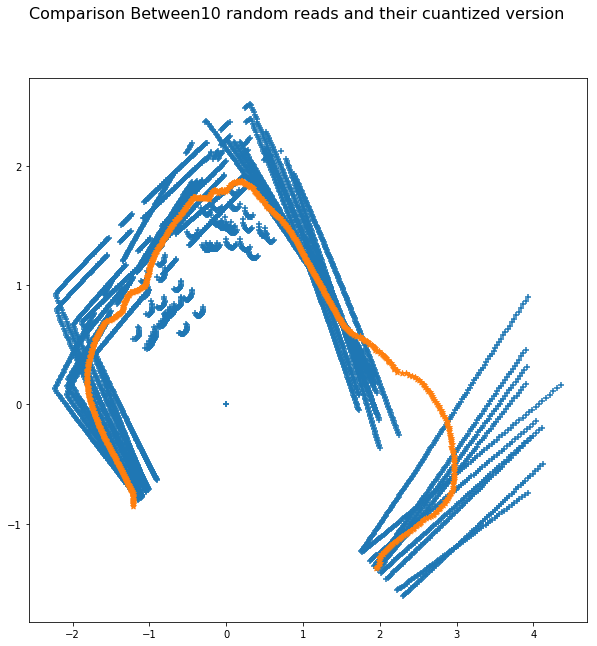

In [29]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [30]:
############################################################################################


In [31]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 285)

285


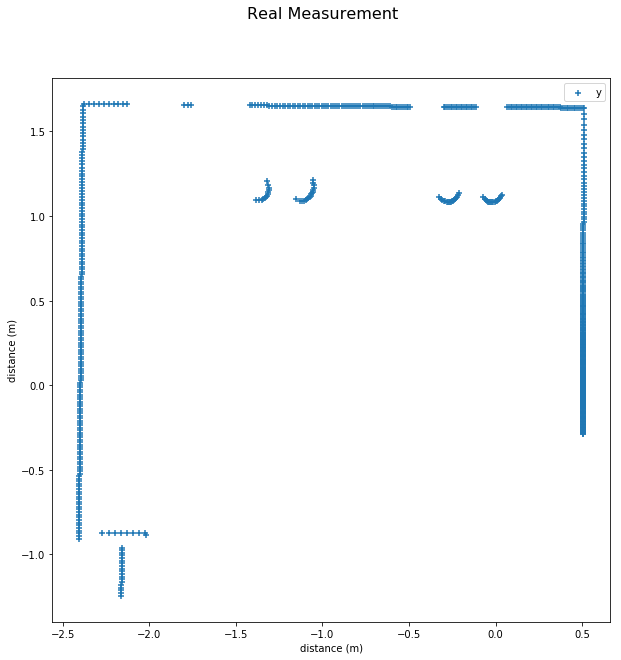

In [32]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']


lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))

fig.suptitle("Real Measurement", fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

ax1.set_xlabel('distance (m)')
ax1.set_ylabel('distance (m)')

ax1.legend()
CORDS_ORIG = pd.DataFrame((cordsx,cordsy))
CORDS_ORIG=CORDS_ORIG.T
CORDS_ORIG.columns=['x','y']

In [33]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

285


285


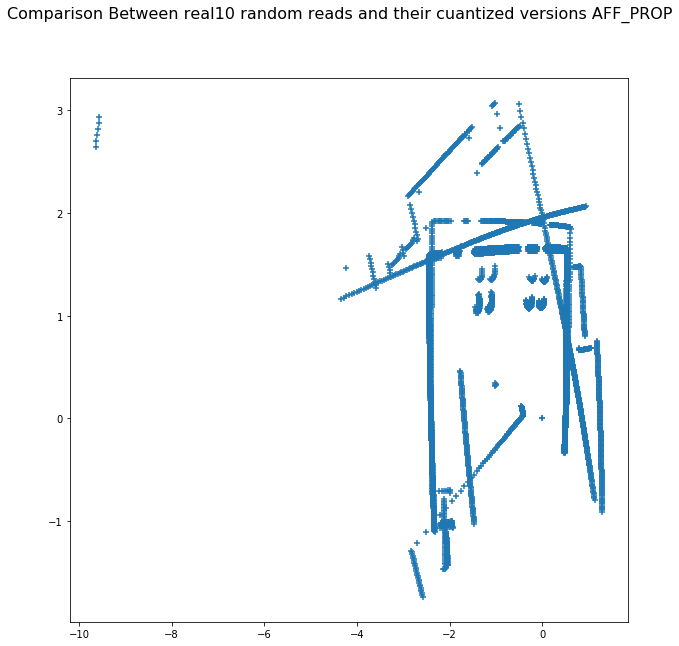

In [34]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

In [35]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

285


285


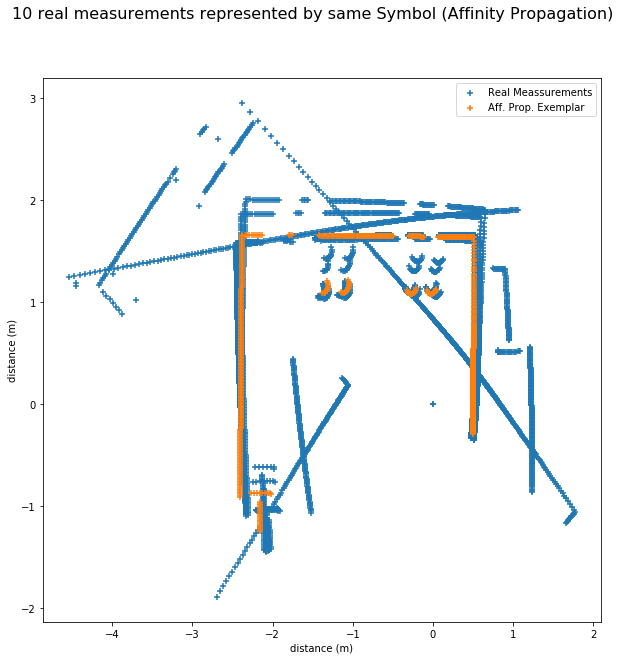

In [36]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('10 real measurements represented by same Symbol (Affinity Propagation)', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', label='Real Meassurements')
ax1.scatter(x= CORDS_ORIG.x, y=CORDS_ORIG.y,marker='+', label = 'Aff. Prop. Exemplar')

ax1.set_xlabel('distance (m)')
ax1.set_ylabel('distance (m)')

ax1.legend()
print(lec_leida)

In [37]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING 3rd MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 285)

COMPARING AFF PROP READINGS NO centroid
285


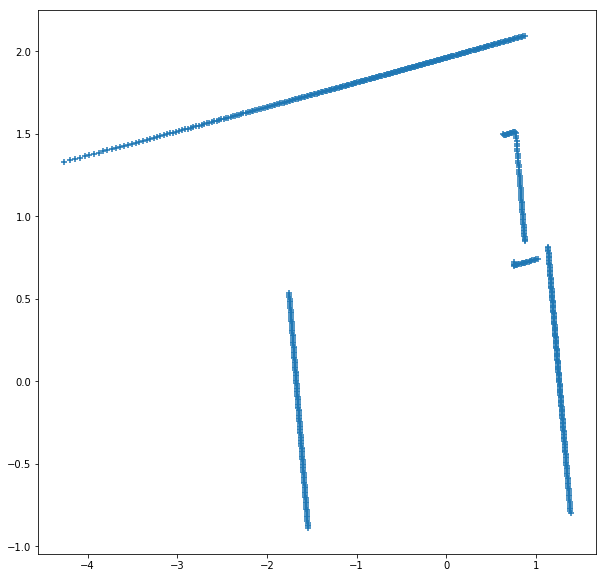

In [38]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [39]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

285


285


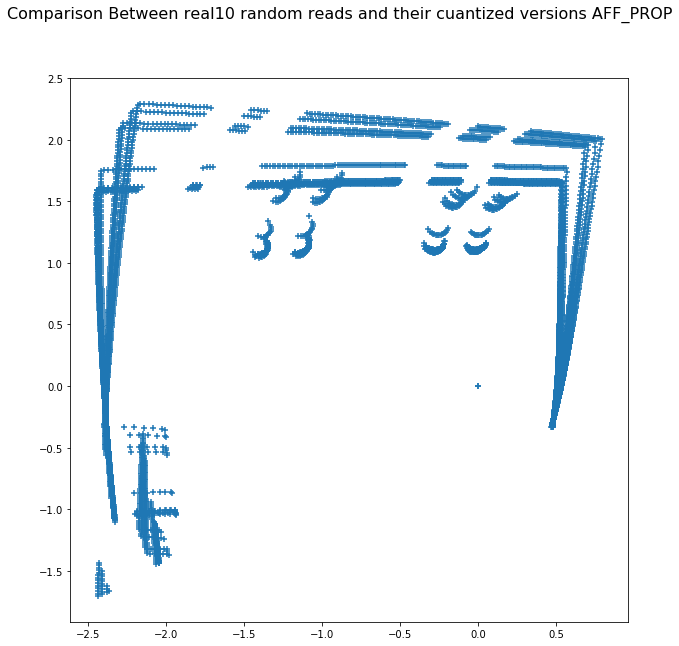

In [40]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

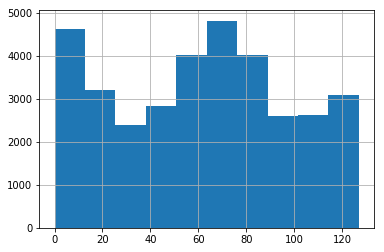

In [41]:
data.Vk.hist()

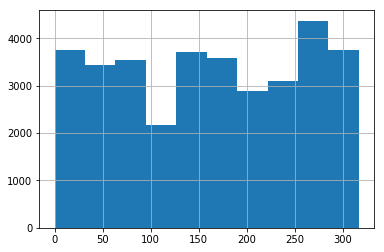

In [42]:
data.Vk_aff.hist()

(<matplotlib.collections.PathCollection at 0x7f62865c06d0>,
                  x            y      Vk            Y
 count  1646.000000  1646.000000  1646.0  1646.000000
 mean      1.260884     2.822679     3.0    15.186513
 std       0.206865     1.376982     0.0    11.089132
 min       0.729405     0.259988     3.0     0.000000
 25%       1.125822     0.901652     3.0     1.000000
 50%       1.254253     3.688307     3.0    14.000000
 75%       1.388325     3.790280     3.0    26.000000
 max       1.911159     3.994458     3.0    31.000000)

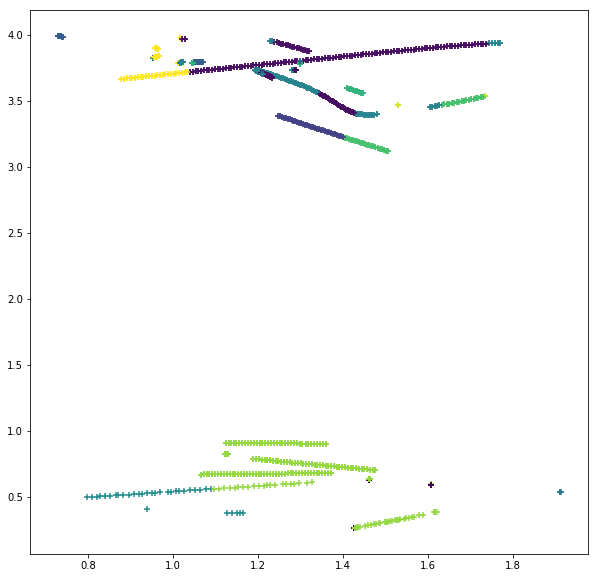

In [43]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','Vk','Y']][data.Vk==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f6286190fd0>,
                  x            y        theta           Vk            Y
 count  4449.000000  4449.000000  4449.000000  4449.000000  4449.000000
 mean      1.132324     3.389056     0.026456    47.667116    17.298045
 std       0.399778     1.073987     2.410795    35.030350    10.493712
 min       0.420576     0.259988    -3.141142     3.000000     0.000000
 25%       0.869000     3.524715    -2.865176     3.000000     6.000000
 50%       1.070938     3.787257     0.321012    66.000000    14.000000
 75%       1.303532     3.927279     2.512447    85.000000    26.000000
 max       2.344830     4.354215     3.140763    85.000000    31.000000)

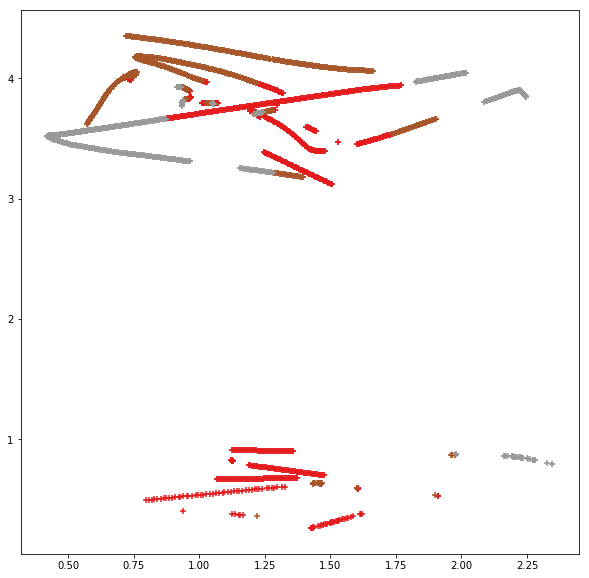

In [44]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','theta','Vk','Y']][data.Vk==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk,marker='+',cmap='Set1'),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f6286597290>,
                 x           y  Vk_aff           Y
 count  837.000000  837.000000   837.0  837.000000
 mean     1.232255    3.604335    35.0   19.471924
 std      0.144904    0.429138     0.0    5.585845
 min      0.737431    0.393544    35.0    0.000000
 25%      1.200210    3.602739    35.0   20.000000
 50%      1.267655    3.702699    35.0   20.000000
 75%      1.298832    3.741541    35.0   20.000000
 max      1.666056    3.822348    35.0   31.000000)

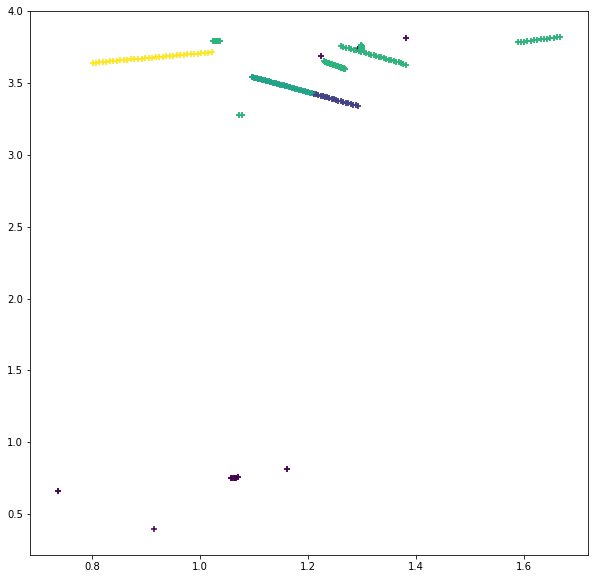

In [45]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','Vk_aff','Y']][data.Vk_aff==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7f62868bc610>,
                  x            y        theta       Vk_aff            Y
 count  2389.000000  2389.000000  2389.000000  2389.000000  2389.000000
 mean      0.722246     2.899040    -1.335233   114.434073    14.277103
 std       0.635031     1.189992     1.308410   132.079494     9.226640
 min      -0.189106     0.393544    -2.941911     8.000000     0.000000
 25%      -0.150421     1.292159    -2.567516     8.000000    10.000000
 50%       0.985721     3.663040    -1.704825    35.000000    10.000000
 75%       1.264985     3.790340    -0.052819   302.000000    20.000000
 max       2.197735     4.386005     1.806532   302.000000    31.000000)

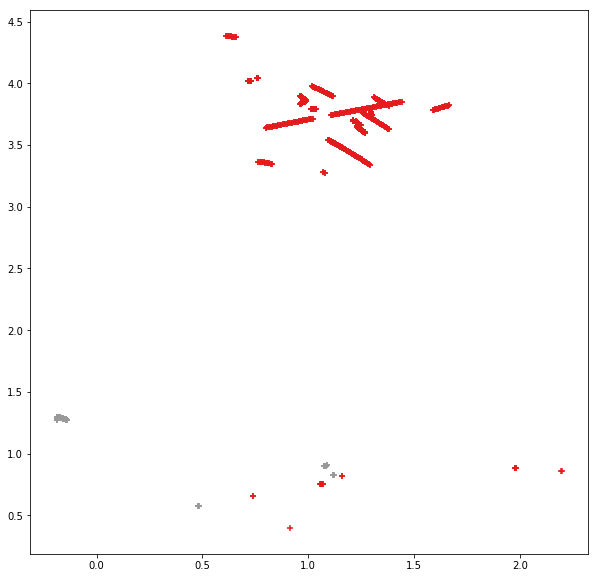

In [46]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk_aff,marker='+',cmap='Set1'),xy.describe()

In [47]:
aux=pd.DataFrame(data.Vk.value_counts())
cents=[]
for i in aux.index[:3]:
    print (data[data.Vk==i][['x','y','theta']].describe())
    cents.append(data[data.Vk==i][['x','y','theta']].mean(axis=0))

aux=pd.DataFrame(data.Vk_aff.value_counts())
cents_aff=[]
for i in aux.index[:3]:
    print (data[data.Vk_aff==i][['x','y','theta']].describe())
    cents_aff.append(data[data.Vk_aff==i][['x','y','theta']].mean(axis=0))

                 x            y        theta
count  1646.000000  1646.000000  1646.000000
mean      1.260884     2.822679    -0.440440
std       0.206865     1.376982     2.280850
min       0.729405     0.259988    -3.141142
25%       1.125822     0.901652    -2.891546
50%       1.254253     3.688307    -0.086999
75%       1.388325     3.790280     1.778234
max       1.911159     3.994458     3.140763
                 x            y        theta
count  1638.000000  1638.000000  1638.000000
mean      1.012221     3.878535     0.844313
std       0.304632     0.535793     2.472753
min       0.572268     0.364433    -3.140950
25%       0.758448     3.794013    -1.945895
50%       0.946843     4.012522     2.538220
75%       1.209171     4.086282     2.839845
max       1.975445     4.354215     3.140682
                 x            y        theta
count  1165.000000  1165.000000  1165.000000
mean      1.119551     3.501065    -0.463791
std       0.613115     0.721819     2.183553
min       

In [48]:
cents_aff=np.asarray(cents_aff)

In [49]:
cents_aff

array([[ 1.23225481,  3.60433456, -1.34134765],
       [-0.13581265,  1.2745676 , -0.06498616],
       [ 1.04852055,  3.80185809, -2.63868489]])

In [50]:
cents

[x        1.260884
 y        2.822679
 theta   -0.440440
 dtype: float64, x        1.012221
 y        3.878535
 theta    0.844313
 dtype: float64, x        1.119551
 y        3.501065
 theta   -0.463791
 dtype: float64]

In [53]:

def plot_path(path):
    fig=plt.figure(figsize=(10,10))
    
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
       
        if i < 2or   i >= len(path)-2 :
            
           
            size=50
            color='blue'
            if  i >= len(path)-2:
                color='red'
            plt.plot(c[0], c[1], marker=(1, 1,ang -90), markersize=size*2,c=color, linestyle='None',alpha=0.75)
        else:
            size=10
            color='green'
        

        plt.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=size,c=color, linestyle='None',alpha=0.5)
        #plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

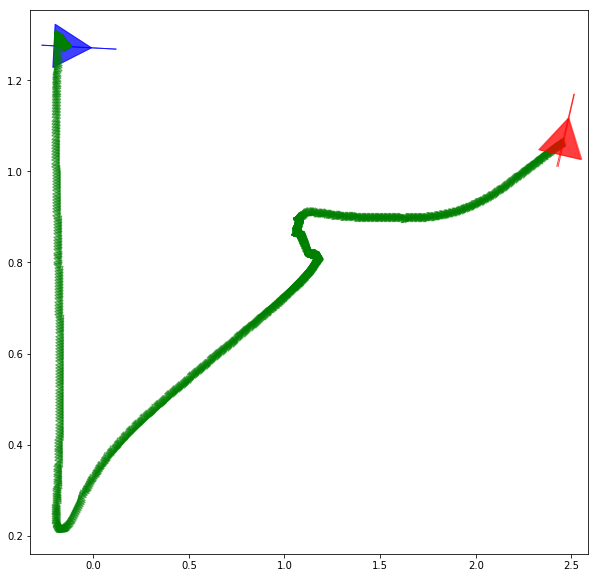

In [65]:
episode_length=1500

start= np.int(np.random.rand()*(len(data)-episode_length))
path = data[['x','y','theta']].iloc[start:start+episode_length].values
plot_path(path)

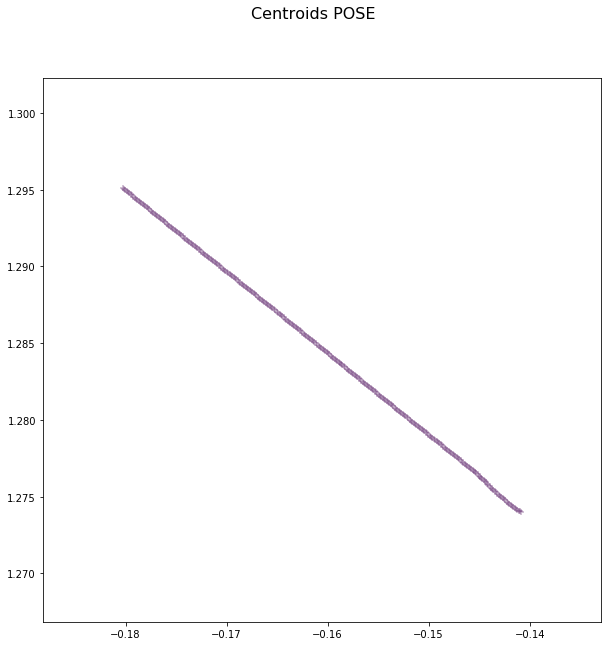

In [66]:
cc=ccxyth
fig = plt.figure(figsize=(10,10))
fig.suptitle('Centroids POSE', fontsize=16)
ax1 = fig.add_subplot(111)

ax1.scatter(x= data.x.iloc[start:start+300], y=data.y.iloc[start:start+300],marker='+',c=data.Y.iloc[start:start+300],alpha=.313)
#cords3=path_to_xyth(np.arange(0,Modelo1.A.shape[0]),cc)
#ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c=cords3.thcuant)
#legend1 = ax1.legend(*scatter.legend_elements(),loc=3 ,title="Classes")
#ax1.add_artist(legend1)
#ax1.legend()


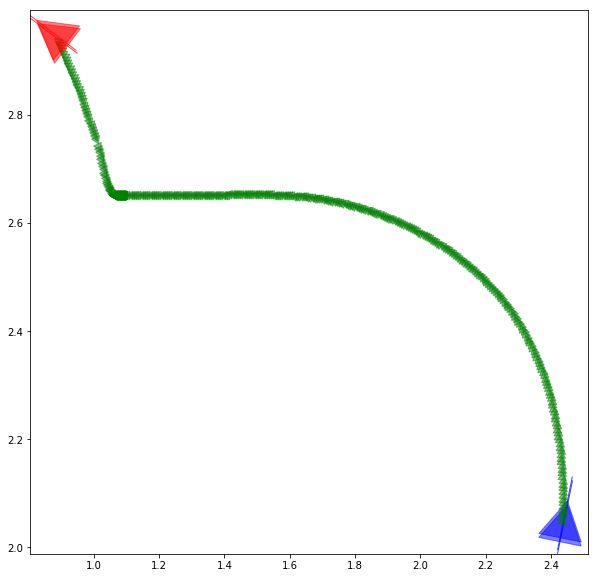

In [56]:
plot_path(path)

In [57]:
import math

In [58]:
path=data[['x','y','theta']].iloc[:300].values

In [59]:
len(path)

300

In [60]:
enumerate (path)

In [61]:
for i , j in enumerate(path):
    print i,j

0 [2.35544461 4.09542701 1.73408236]
1 [2.35541595 4.09545109 1.73442503]
2 [2.35539022 4.09548212 1.73478489]
3 [2.35537077 4.09552206 1.73517136]
4 [2.35534828 4.09556123 1.73557835]
5 [2.35532816 4.09560096 1.73598698]
6 [2.35530896 4.09563711 1.73636722]
7 [2.35529323 4.09567031 1.73670413]
8 [2.35528036 4.09569808 1.73698783]
9 [2.35527258 4.09572026 1.73721284]
10 [2.35526787 4.09573541 1.73737239]
11 [2.35526207 4.09574595 1.73750192]
12 [2.35526193 4.09574679 1.73754438]
13 [2.35526282 4.09573934 1.73749444]
14 [2.35526562 4.09572493 1.73736863]
15 [2.35526686 4.09570256 1.73716777]
16 [2.35526834 4.0956689  1.7368901 ]
17 [2.35526942 4.09562687 1.73653811]
18 [2.35526683 4.09557605 1.73611498]
19 [2.35526096 4.09551677 1.73562225]
20 [2.3552601  4.09545248 1.73509102]
21 [2.35526107 4.09538459 1.73452007]
22 [2.3552371  4.09530305 1.73381134]
23 [2.35528253 4.09524768 1.73328386]
24 [2.35530009 4.0951753  1.73263106]
25 [2.35531867 4.09510228 1.7319867 ]
26 [2.35533391 4.09503

In [ ]:
path = 